# Airline Passenger Satisfaction Analysis

## Table of Contents
1. [Project Overview](#project-overview)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Feature Engineering](#feature-engineering)
5. [Model Training](#model-training)
6. [Model Evaluation](#model-evaluation)

## Project Overview
This project analyzes airline passenger satisfaction using machine learning techniques. The goal is to predict passenger satisfaction based on various flight and service-related features.

## Data Preprocessing

### Data Loading and Initial Exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [6]:
df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [7]:
df.shape

(103904, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Handling Missing Values

In [9]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

We found some missing values in the `Arrival Delay in Minutes` column, which are in a very small small quantity. So, we may drop those null values entirely

In [10]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


We don't need `id`, `Unnamed: 0` columns as they will not add any values to the model prediction and its better to simply drop them

In [11]:
df.drop(columns=['id', 'Unnamed: 0'], inplace=True)

### Check for unique categorical values

In [12]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(f"Unique values in column {col}")
        print(df[col].unique())

Unique values in column Gender
['Male' 'Female']
Unique values in column Customer Type
['Loyal Customer' 'disloyal Customer']
Unique values in column Type of Travel
['Personal Travel' 'Business travel']
Unique values in column Class
['Eco Plus' 'Business' 'Eco']
Unique values in column Inflight wifi service
[3 2 4 1 5 0]
Unique values in column Departure/Arrival time convenient
[4 2 5 3 1 0]
Unique values in column Ease of Online booking
[3 2 5 4 1 0]
Unique values in column Gate location
[1 3 2 5 4 0]
Unique values in column Food and drink
[5 1 2 4 3 0]
Unique values in column Online boarding
[3 5 2 1 4 0]
Unique values in column Seat comfort
[5 1 2 3 4 0]
Unique values in column Inflight entertainment
[5 1 2 3 4 0]
Unique values in column On-board service
[4 1 2 3 5 0]
Unique values in column Leg room service
[3 5 4 2 1 0]
Unique values in column Baggage handling
[4 3 5 1 2]
Unique values in column Checkin service
[4 1 3 5 2 0]
Unique values in column Inflight service
[5 4 3 1 2 0]
U

So, we found that these columns have categorical values that needs to be encoded:
- Unique values in column Gender
['Male' 'Female']
- Unique values in column Customer Type
['Loyal Customer' 'disloyal Customer']
- Unique values in column Type of Travel
['Personal Travel' 'Business travel']
- Unique values in column Class
['Eco Plus' 'Business' 'Eco']
- Unique values in column satisfaction
['neutral or dissatisfied' 'satisfied']

Here we need to encode every columns using `Label Encoding` except the `Gender` column which needs to be encoded using `One Hot` as it doesn't have any ordinal relation.

### Feature Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cat_cols = ['Type of Travel', 'Customer Type', 'Class', 'satisfaction']
oh_col = ['Gender']

encoding_dict = {}
le = LabelEncoder()
oh = OneHotEncoder(sparse_output=False)

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    encoding_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))

encoded_data = oh.fit_transform(df[oh_col])
encoded_df = pd.DataFrame(encoded_data, columns=oh.get_feature_names_out(oh_col))
final_df = pd.concat([df.drop(columns=oh_col), encoded_df], axis=1)
df.drop(columns=['Gender'], inplace=True)

print("\nEncoding Mappings:")
for col, mapping in encoding_dict.items():
    print(f"{col}: {mapping}")

print("\nFinal DataFrame:")
final_df.head()


Encoding Mappings:
Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}

Final DataFrame:


,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male
0,0,13,1,2,460,3,4,3,1,5,...,3,4,4,5,5,25,18.0,0,0.0,1.0
1,1,25,0,0,235,3,2,3,3,1,...,5,3,1,4,1,1,6.0,0,0.0,1.0
2,0,26,0,0,1142,2,2,2,2,5,...,3,4,4,4,5,0,0.0,1,1.0,0.0
3,0,25,0,0,562,2,5,5,5,2,...,5,3,1,4,2,11,9.0,0,1.0,0.0
4,0,61,0,0,214,3,3,3,3,4,...,4,4,3,3,3,0,0.0,1,0.0,1.0


## Exploratory Data Analysis

### Visualization Techniques

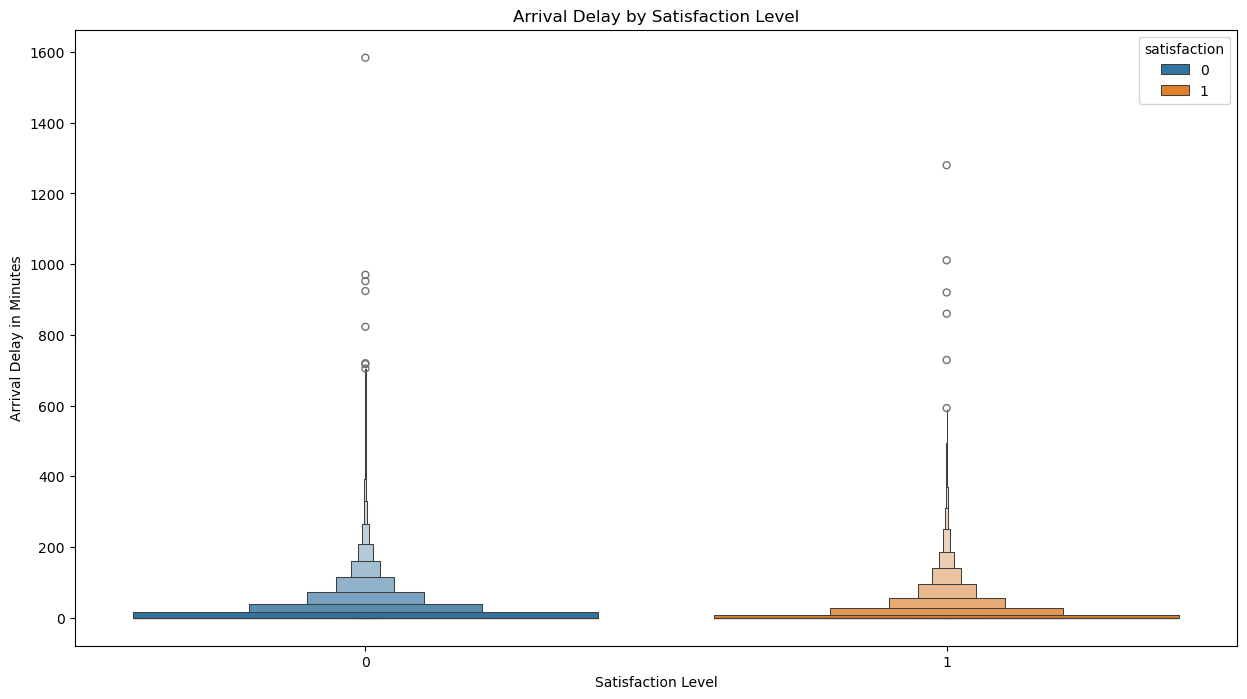

In [14]:
plt.figure(figsize=(15, 8)) 
sns.boxenplot(y=df['Arrival Delay in Minutes'], x=df['satisfaction'], hue=df['satisfaction'])
plt.title('Arrival Delay by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Arrival Delay in Minutes')
plt.show()

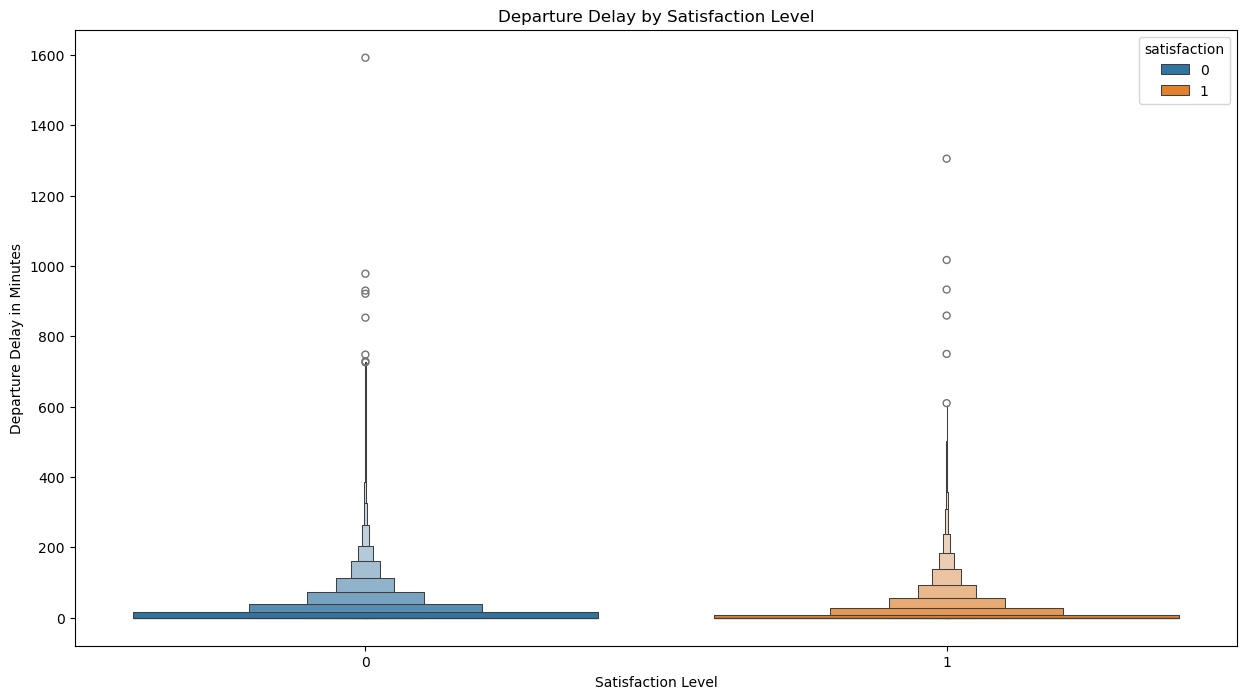

In [15]:
plt.figure(figsize=(15, 8)) 
sns.boxenplot(y=df['Departure Delay in Minutes'], x=df['satisfaction'], hue=df['satisfaction'])
plt.title('Departure Delay by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Departure Delay in Minutes')
plt.show()

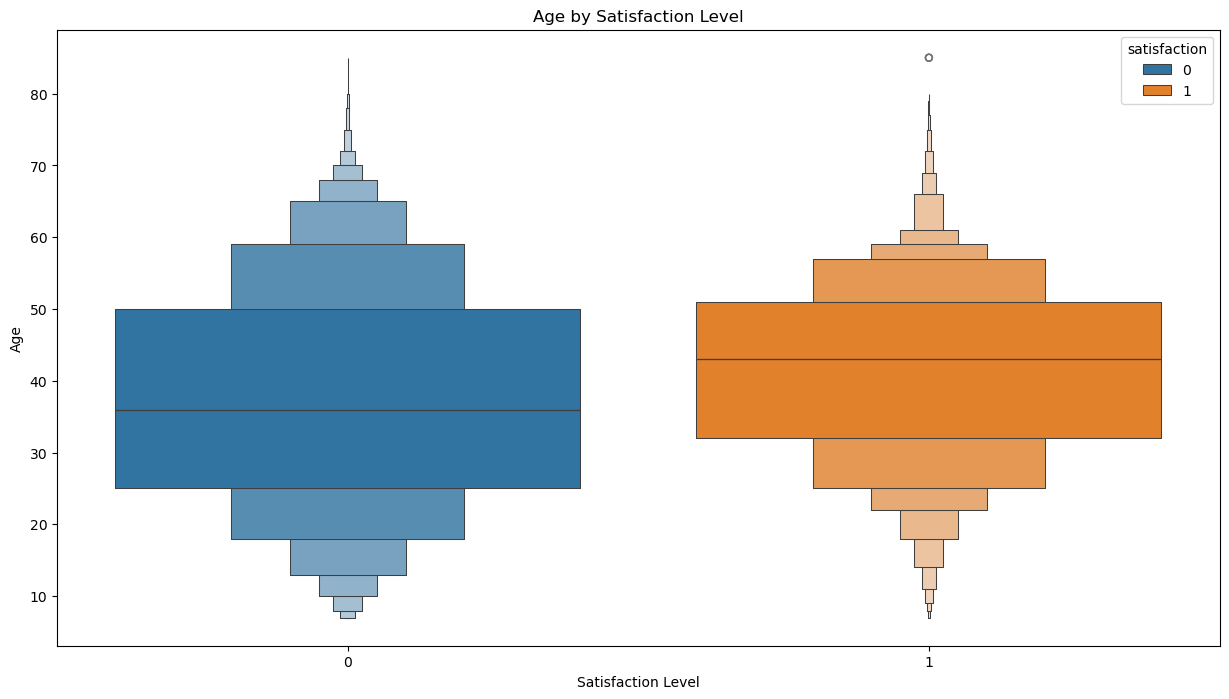

In [16]:
plt.figure(figsize=(15, 8)) 
sns.boxenplot(y=df['Age'], x=df['satisfaction'], hue=df['satisfaction'])
plt.title('Age by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Age')
plt.show()

In [17]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]

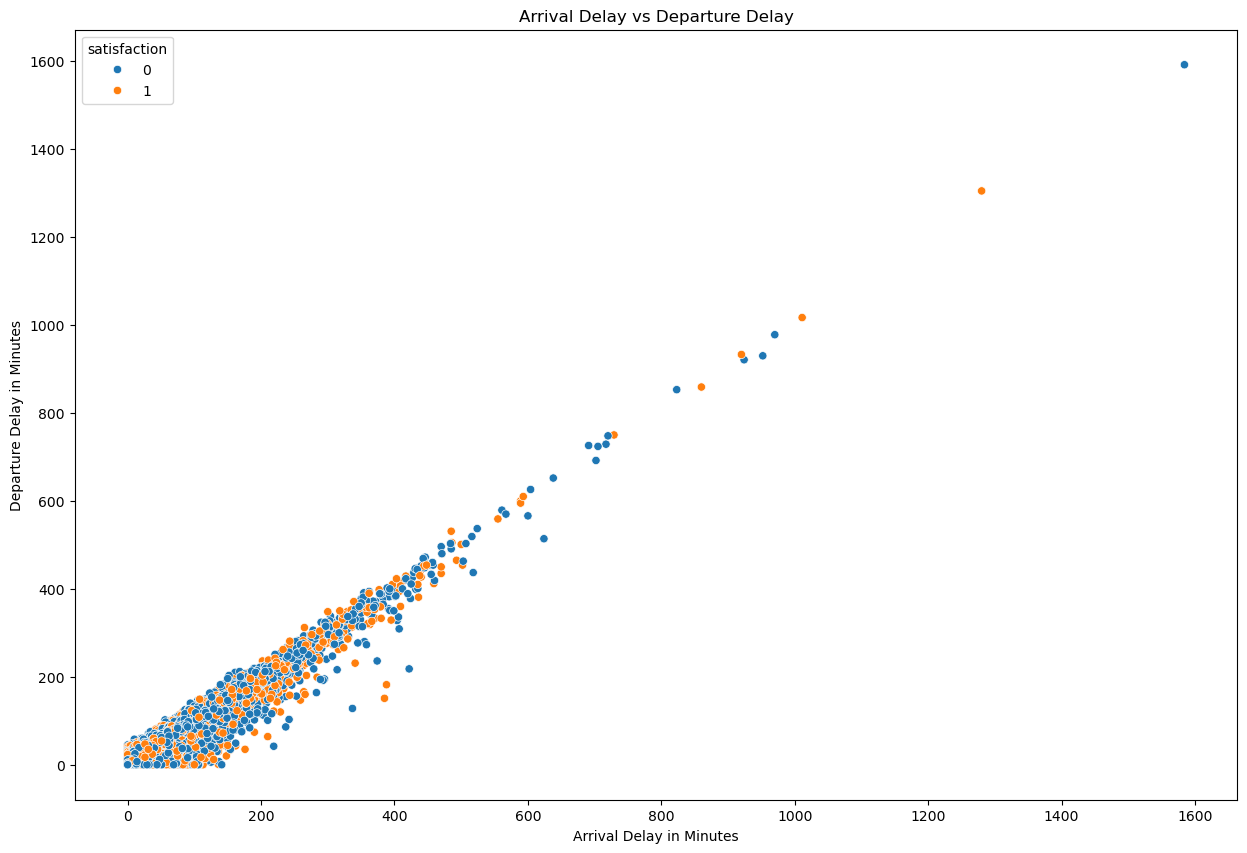

In [18]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=features, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

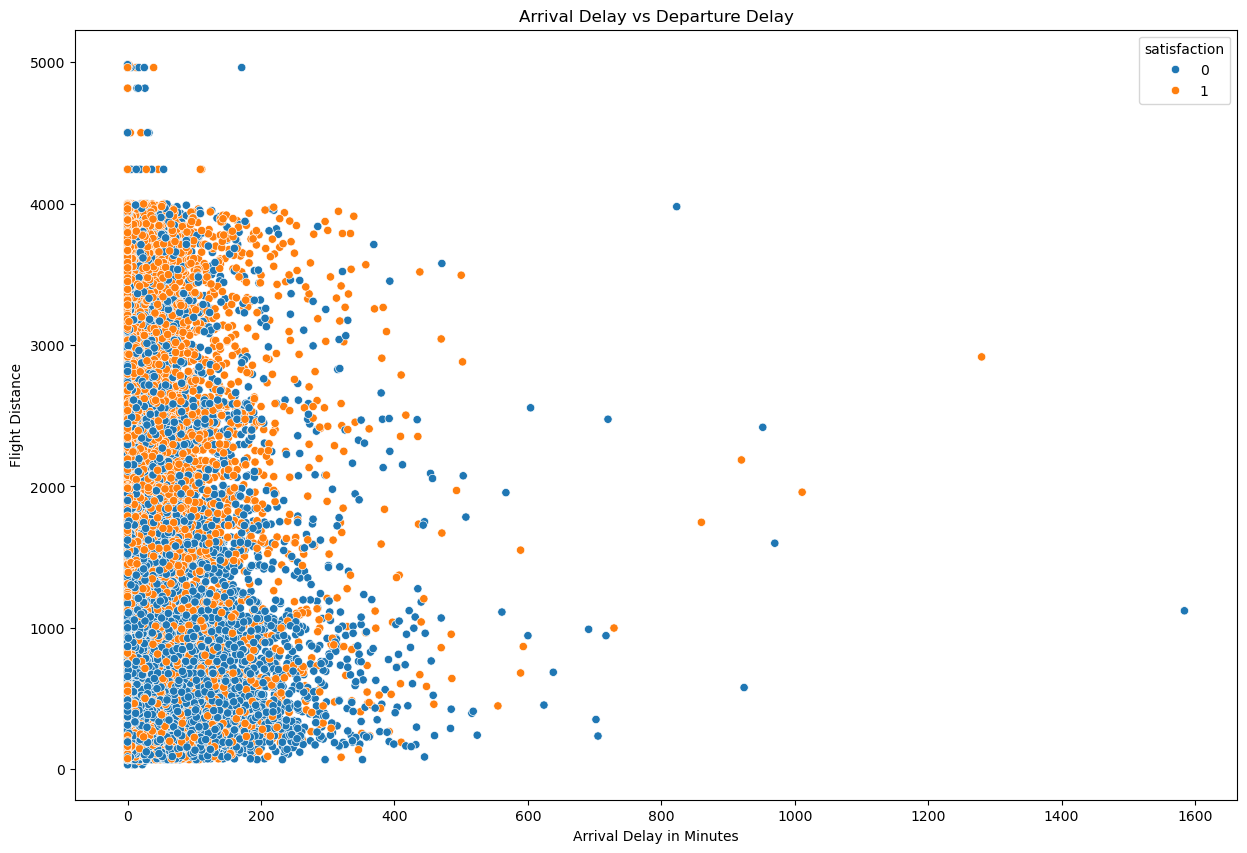

In [19]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=features, x='Arrival Delay in Minutes', y='Flight Distance', hue='satisfaction')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

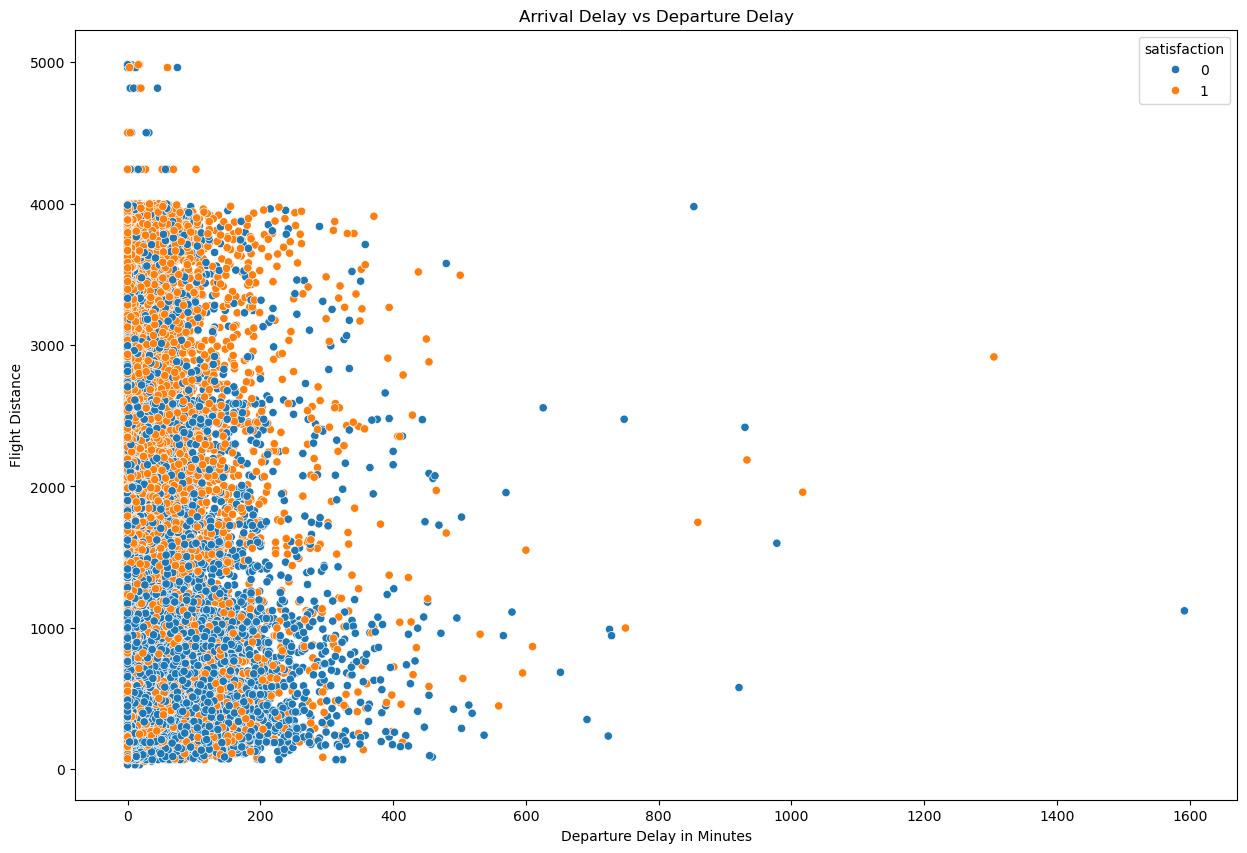

In [20]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=features, x='Departure Delay in Minutes', y='Flight Distance', hue='satisfaction')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

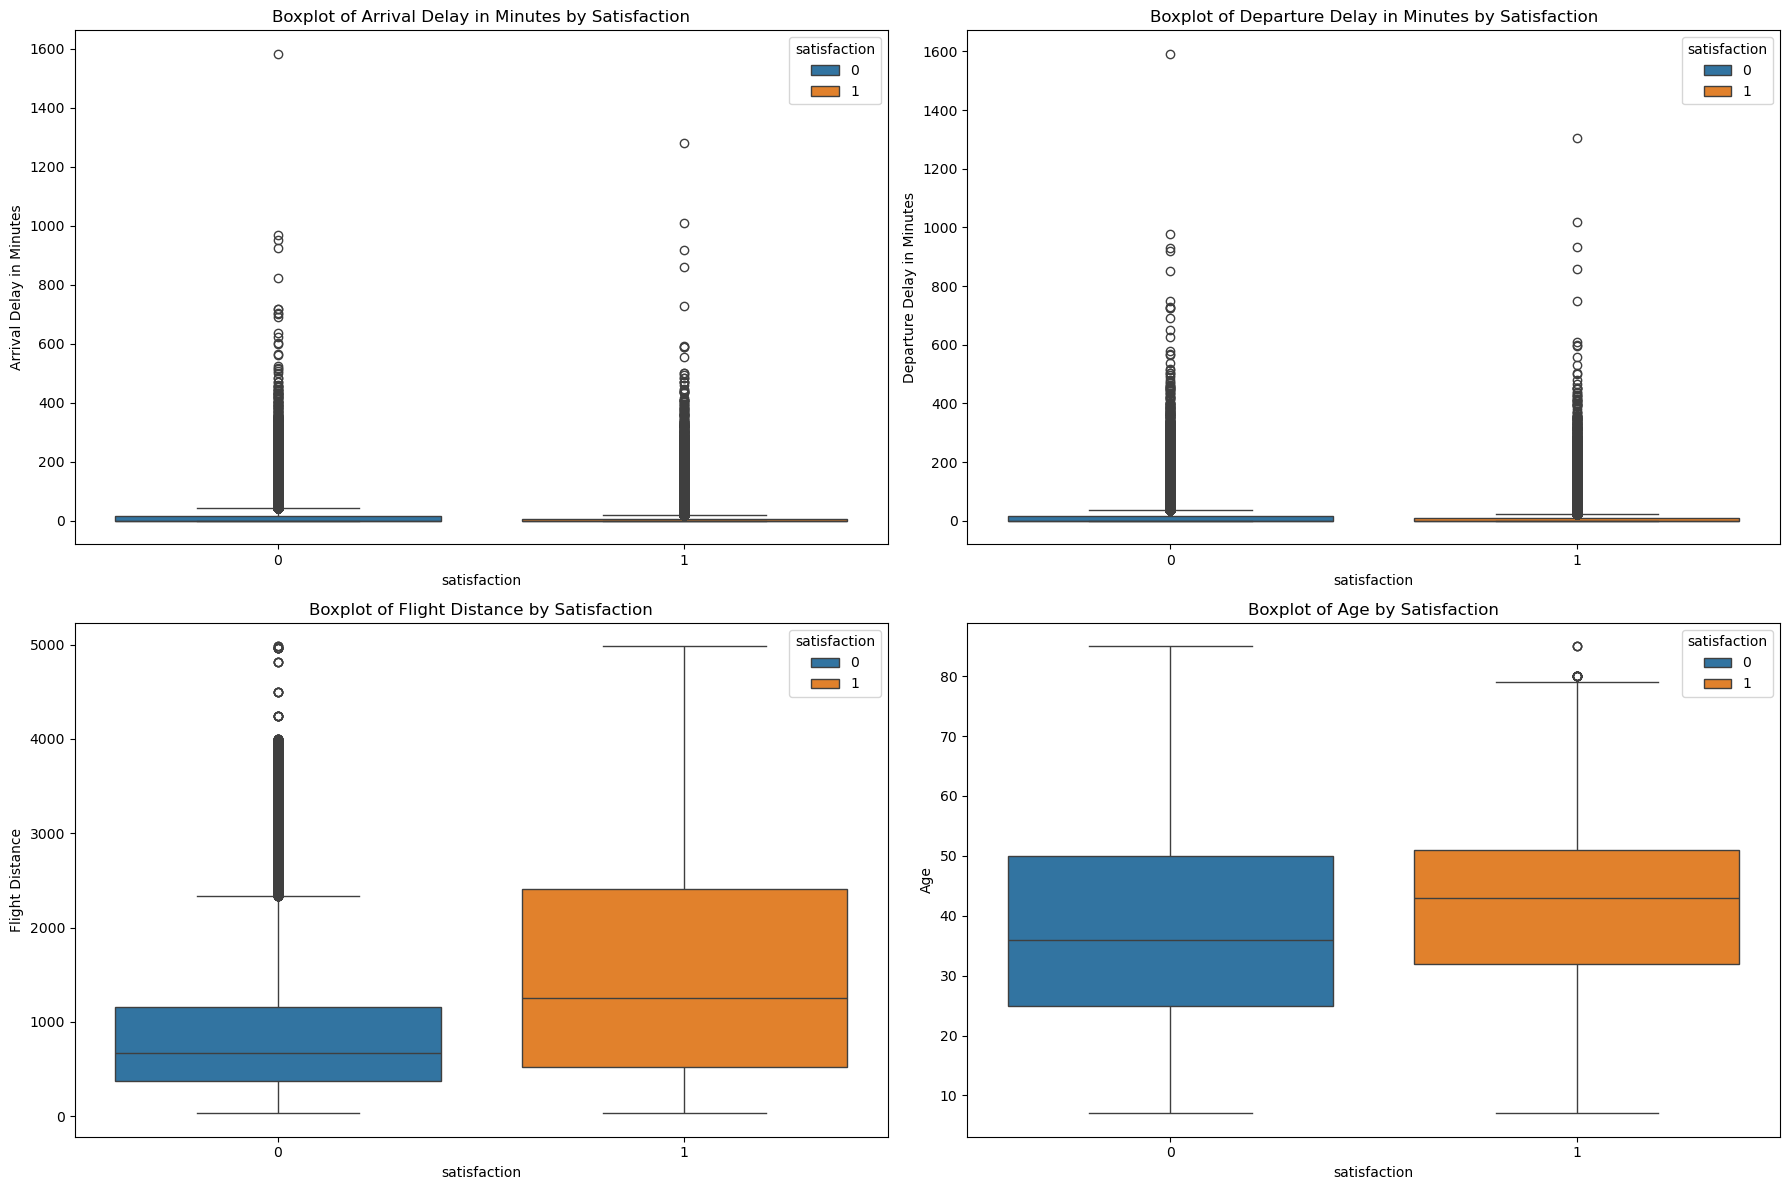

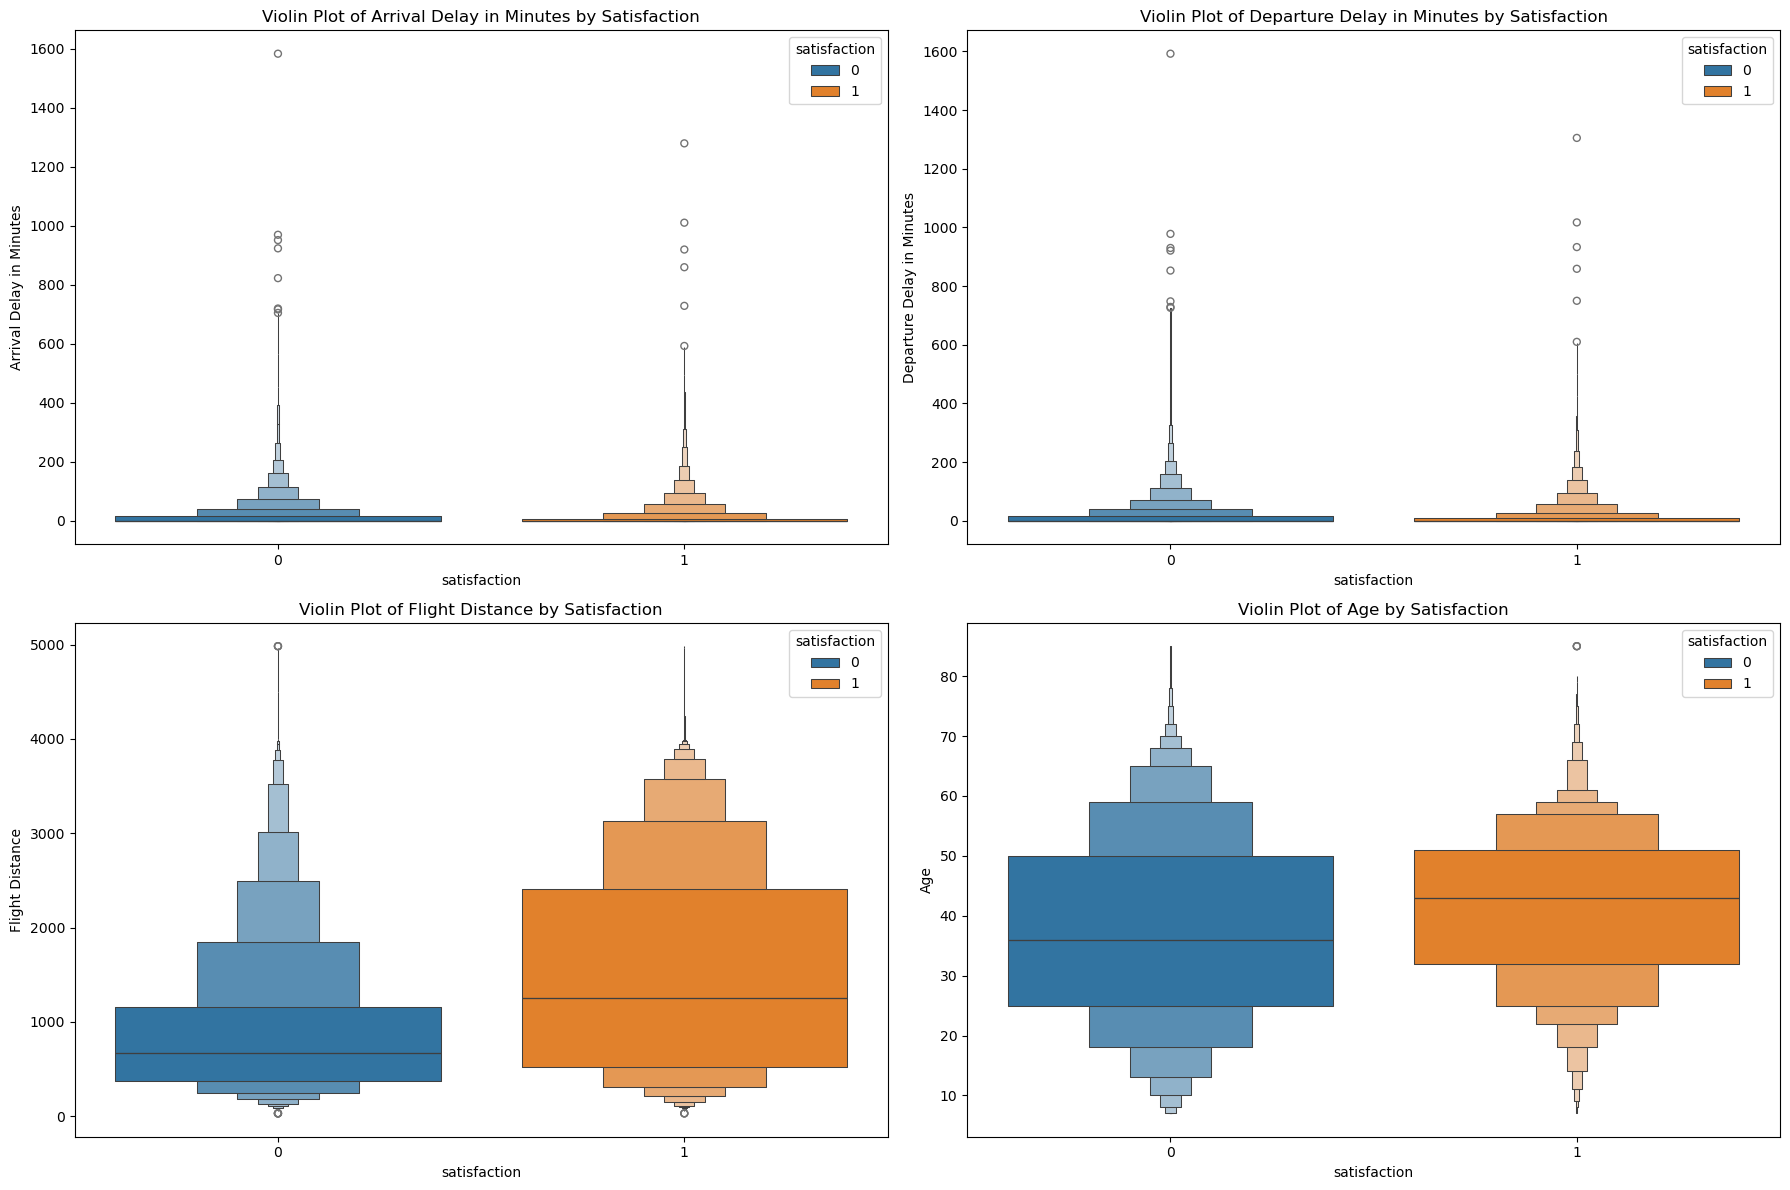

In [21]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='satisfaction', y=column, data=features, hue='satisfaction')
    plt.title(f'Boxplot of {column} by Satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxenplot(x='satisfaction', y=column, data=features, hue='satisfaction')
    plt.title(f'Violin Plot of {column} by Satisfaction')
plt.tight_layout()
plt.show()


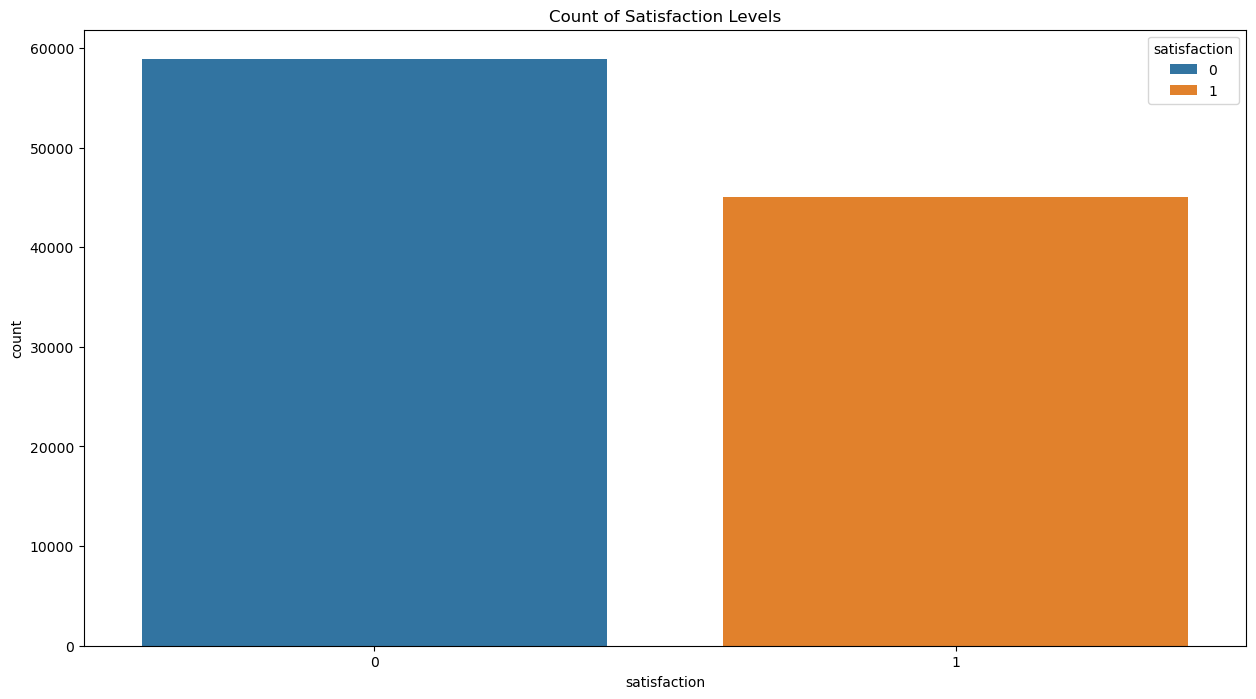

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(x='satisfaction', data=features, hue='satisfaction')
plt.title('Count of Satisfaction Levels')
plt.show()


The target column isn't very imbalanced, so no need to use `SMOTE` or `ADASYN` or others

Missing Values:
 Arrival Delay in Minutes      310
Departure Delay in Minutes      0
Flight Distance                 0
Age                             0
satisfaction                    0
dtype: int64


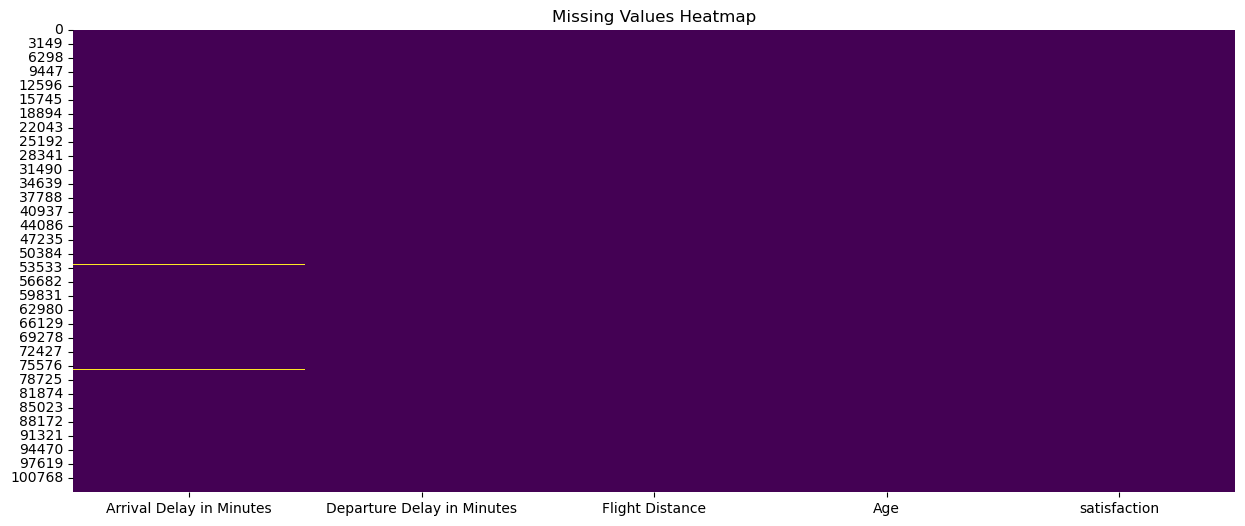

In [23]:
missing_values = features.isnull().sum()
print("Missing Values:\n", missing_values)

plt.figure(figsize=(15, 6))
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

This confirms the positions and spread of null values in the `Arrival Delay in Minutes`. So, we'll drop them entirely.

### Distribution Analysis


In [24]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# palette = sns.color_palette("Set2", n_colors=len(features.columns)-1)

# plt.figure(figsize=(15, 10))
# for i, column in enumerate(features.columns[:-1], 1):
#     plt.subplot(2, 2, i)
#     sns.histplot(features[column], kde=True, bins=30, color=palette[i-1], alpha=0.6)
#     plt.title(f'Distribution of {column}', fontsize=16)
#     plt.xlabel(column, fontsize=14)
#     plt.ylabel('Frequency', fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()


The `Arrival Delay in Minutes`, `Departure Delay in Minutes` & `Flight Distance` columns are skewed. So we'll use log transformation in these cases.

In [25]:
# # Pairplot with different kinds of plots
# sns.pairplot(features, hue='satisfaction', diag_kind='kde', markers=["o", "o"])
# plt.suptitle('Pairplot with KDE and Different Markers', y=1.02)
# plt.show()


### Outlier Detection

In [26]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set a color palette
# palette = sns.color_palette("Set1", n_colors=len(features.columns)-1)

# # Outlier detection using IQR
# Q1 = features.quantile(0.25)
# Q3 = features.quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier conditions
# outlier_condition = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))

# # Visualize outliers with enhanced aesthetics
# plt.figure(figsize=(15, 10))
# for i, column in enumerate(features.columns[:-1], 1):  # Exclude 'satisfaction'
#     plt.subplot(2, 2, i)
#     sns.boxplot(x=features[column], color=palette[i-1], fliersize=5, linewidth=1.5)
#     plt.title(f'Boxplot of {column} with Outliers', fontsize=16)
#     plt.xlabel(column, fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# plt.tight_layout()
# plt.show()


In [27]:
# features = df[['Class', 'Type of Travel', 'Seat comfort', 'Inflight entertainment', 'Online boarding', 'Customer Type', 'Inflight wifi service', 'satisfaction']]

# sns.pairplot(features, hue='satisfaction')

In [28]:
# features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]

# sns.pairplot(features, hue='satisfaction')

## Feature Engineering


### Interaction Features


In [29]:
from itertools import combinations

def create_interactions(df, feature_list):
    for feat1, feat2 in combinations(feature_list, 2):
        df[f'{feat1}_x_{feat2}'] = df[feat1] * df[feat2]
    return df

In [30]:
def remove_collinearity_with_target(df, target_col, threshold=0.90):
    X = df.drop(columns=[target_col])
    target_corr = abs(X.corrwith(df[target_col]))
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = []
    
    for col in upper.columns:
        correlated_features = upper[col][upper[col] > threshold].index
        for feat in correlated_features:
            if target_corr[col] < target_corr[feat]:
                to_drop.append(col)
                break
    
    return df.drop(columns=to_drop)

### Correlation Matrix

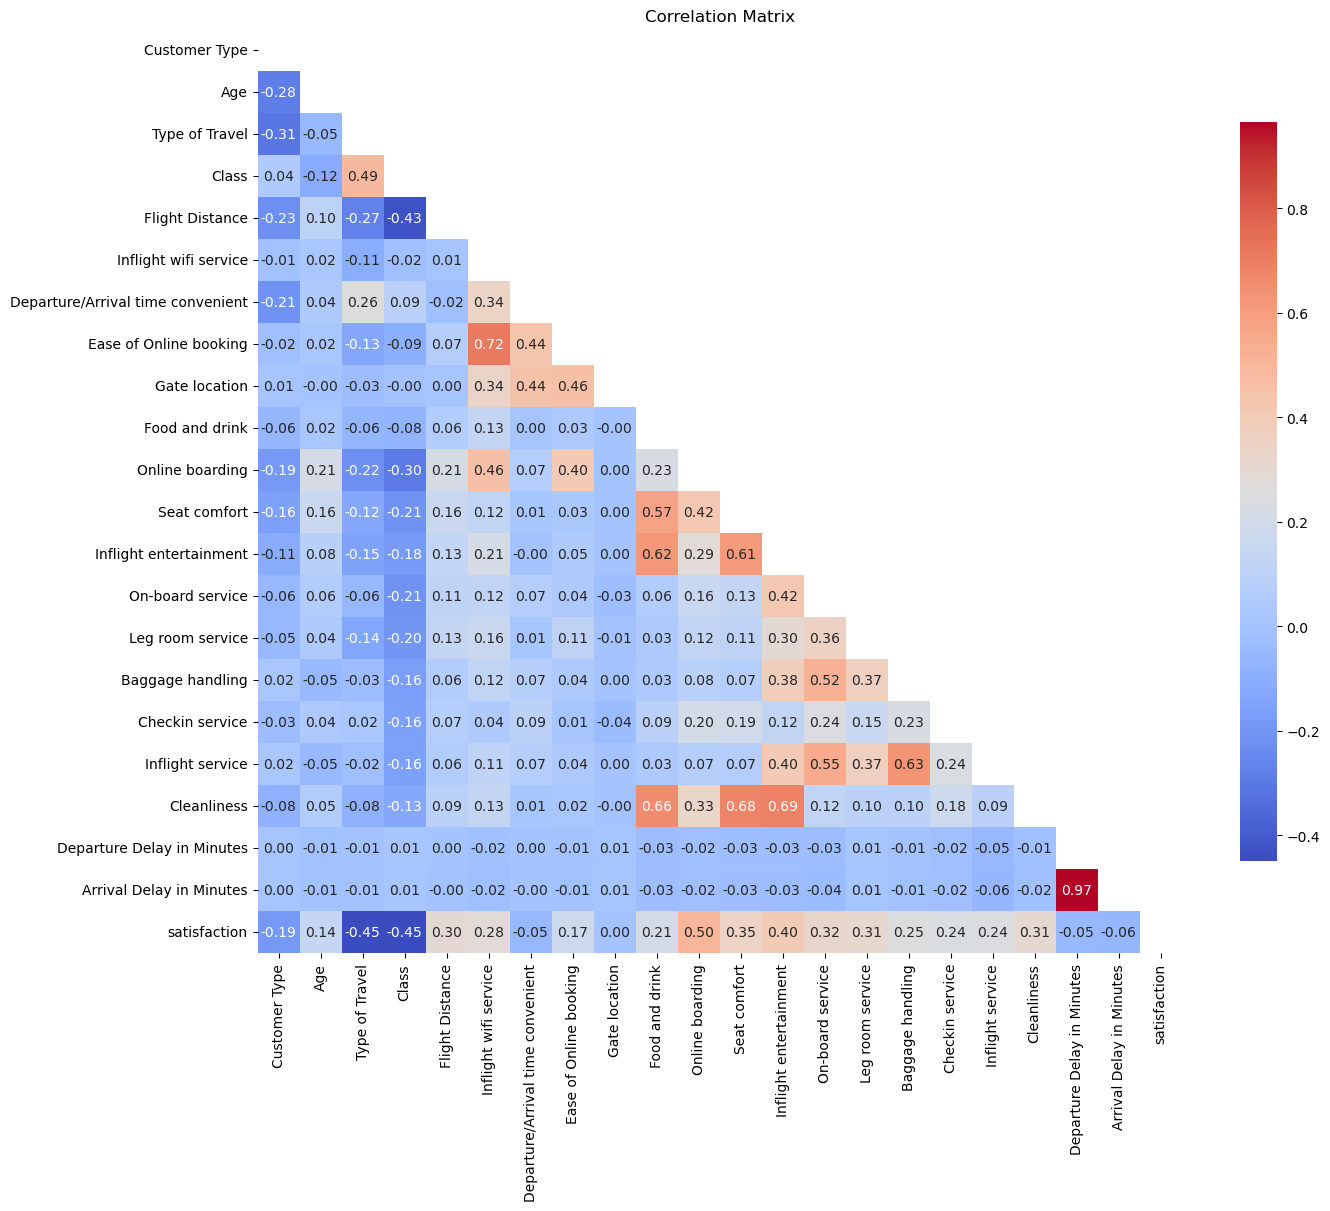

In [31]:
df = df[[col for col in df.columns if col != 'satisfaction'] + ['satisfaction']]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

We can clearly see some highly correlated columns.
- The `Class` and `Type of Travel` column have high negative correlations with the target `satisfaction` column
- The `Online boarding`, `Seat comfort

### Drop all missing rows

In [32]:
df.dropna(axis=0, inplace=True)

In [33]:
df.isnull().sum()

Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
import pandas as pd
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

X = df.drop(columns=["satisfaction"])
y = df["satisfaction"]
X = pd.get_dummies(X, drop_first=True)

model = xgb.XGBClassifier() if y.nunique() > 2 else xgb.XGBRegressor()
model.fit(X, y)

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

plt.figure(figsize=(15, 10))
shap.summary_plot(shap_values, X)

plt.figure(figsize=(15, 10))
shap.summary_plot(shap_values, X, plot_type="bar")

plt.figure(figsize=(15, 10))
shap.plots.waterfall(shap_values[0])

features = ['Type of Travel', 'Inflight wifi service', 'Online boarding', 'Inflight service', 'Customer Type', 'Cleanliness', 'Inflight entertainment', 'Class', 'Seat comfort']

In [35]:
features = ['Class', 'Seat comfort', 'Inflight entertainment', 'Online boarding', 'Customer Type', 'Inflight wifi service']
df = create_interactions(df, features)

In [36]:
df = remove_collinearity_with_target(df, 'satisfaction', 0.85)

### Outlier Handling


In [37]:
def remove_outliers(df, method="zscore", threshold=3):
    df_clean = df.copy()
    
    if method == "zscore":
        z_scores = np.abs((df_clean - df_clean.mean()) / df_clean.std())
        df_clean = df_clean[(z_scores < threshold).all(axis=1)]
    
    elif method == "iqr":
        Q1 = df_clean.quantile(0.25)
        Q3 = df_clean.quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    elif method == "percentile":
        lower, upper = df_clean.quantile(0.01), df_clean.quantile(0.99)
        df_clean = df_clean[(df_clean >= lower) & (df_clean <= upper)].dropna()

    return df_clean


# df = remove_outliers(df, method="iqr")


In [38]:
def cap_outliers(df, method="zscore", threshold=3):
    df_capped = df.copy()

    if method == "zscore":
        z_scores = np.abs((df_capped - df_capped.mean()) / df_capped.std())
        df_capped[z_scores > threshold] = df_capped.mean() + np.sign(df_capped - df_capped.mean()) * df_capped.std() * threshold

    elif method == "iqr":
        Q1 = df_capped.quantile(0.25)
        Q3 = df_capped.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped = df_capped.apply(lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name], 
                                                        np.where(x > upper_bound[x.name], upper_bound[x.name], x)))

    elif method == "percentile":
        lower, upper = df_capped.quantile(0.01), df_capped.quantile(0.99)
        df_capped = df_capped.apply(lambda x: np.where(x < lower[x.name], lower[x.name], 
                                                        np.where(x > upper[x.name], upper[x.name], x)))

    return pd.DataFrame(df_capped, columns=df.columns)

# df = cap_outliers(df, method="iqr")

### Skewness Transformation

In [39]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).abs()
skewed_cols = skewed_cols[skewed_cols > 0.5].index

def transform_skewed(df, method="log"):
    df_transformed = df.copy()
    
    for col in skewed_cols:
        if method == "log":
            df_transformed[col] = np.log1p(df_transformed[col])
        elif method == "sqrt":
            df_transformed[col] = np.sqrt(df_transformed[col])
        elif method == "boxcox":
            from scipy.stats import boxcox
            df_transformed[col], _ = boxcox(df_transformed[col] + 1)
    
    return df_transformed

df = transform_skewed(df, method="log")

X = df[['Type of Travel', 'Inflight wifi service', 'Online boarding', 'Inflight service', 'Customer Type', 'Cleanliness', 'Inflight entertainment', 'Class', 'Seat comfort']]

In [ ]:
from itertools import combinations


columns = ['Type of Travel', 'Inflight wifi service', 'Online boarding', 
           'Inflight service', 'Customer Type', 'Cleanliness', 
           'Inflight entertainment', 'Class', 'Seat comfort']

# Create interaction features
for feature1, feature2 in combinations(columns, 2):
    interaction_feature_name = f"{feature1}_x_{feature2}"
    df[interaction_feature_name] = df[feature1] * df[feature2]

In [41]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [ ]:
def remove_high_collinearity(df, threshold=0.90):
    correlation_matrix = df.corr().abs()
    
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    df_reduced = df.drop(columns=to_drop)
    
    return df_reduced

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def create_polynomial_features(X, degree=2, interaction_only=False):
    poly = PolynomialFeatures(degree=degree, interaction_only=interaction_only)
    X_poly = poly.fit_transform(X)
    
    feature_names = poly.get_feature_names_out(X.columns)
    X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
    
    X_poly_df = X_poly_df.drop(columns=['1'])
    
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly_df)
    X_poly_scaled_df = pd.DataFrame(X_poly_scaled, columns=X_poly_df.columns)
    
    return X_poly_scaled_df

# X_polynomial = create_polynomial_features(X, degree=2, interaction_only=False)
X = remove_high_collinearity(X, 0.85)

In [44]:
X.shape

(103594, 27)

## Model Training

### Model Selection


In [45]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# lgbm_params = {'n_estimators': 291, 'learning_rate': 0.033236472434062025, 'max_depth': 14, 'num_leaves': 73, 'min_child_samples': 15, 'subsample': 0.6452608030046519, 'colsample_bytree': 0.7351330578836698}
# rf_params = {'n_estimators': 383, 'max_depth': 15, 'min_samples_split': 5, 'max_features': 'sqrt', 'criterion': 'entropy'}
# cb_params = {'iterations': 485, 'learning_rate': 0.02451154055716572, 'depth': 8, 'l2_leaf_reg': 1.312879755477539}
# xgb_params = {'max_depth': 15, 'learning_rate': 0.12204550084705108, 'n_estimators': 61, 'min_child_weight': 1.9190931783540948, 'subsample': 0.9329682809203258, 'colsample_bytree': 0.7196095681095573, 'gamma': 2.3019670579460234}

models = {
    'XGBoost': xgb.XGBClassifier( random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier( random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_seed=42, verbose=False)
}


## Model Evaluation


### Performance Metrics


In [46]:
predictions = {}
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"{name} Results:")
    model.fit(X_train, y_train)
    
    predictions[name] = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, predictions[name]):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, predictions[name]):.4f}")
    print(f"R2 Score: {r2_score(y_test, predictions[name]):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions[name], digits=3))


--------------------------------------------------
XGBoost Results:
Accuracy: 0.9641
ROC AUC: 0.9618
R2 Score: 0.8541

Classification Report:
              precision    recall  f1-score   support

           0      0.957     0.980     0.968     11655
           1      0.974     0.943     0.958      9064

    accuracy                          0.964     20719
   macro avg      0.965     0.962     0.963     20719
weighted avg      0.964     0.964     0.964     20719


--------------------------------------------------
Random Forest Results:
Accuracy: 0.9644
ROC AUC: 0.9619
R2 Score: 0.8555

Classification Report:
              precision    recall  f1-score   support

           0      0.956     0.982     0.969     11655
           1      0.976     0.942     0.959      9064

    accuracy                          0.964     20719
   macro avg      0.966     0.962     0.964     20719
weighted avg      0.965     0.964     0.964     20719


--------------------------------------------------
Li

In [47]:
# models_comparison = pd.DataFrame({
#     'Model': list(models.keys()),
#     'Accuracy': [accuracy_score(y_test, predictions[model]) for model in models.keys()],
#     'ROC AUC': [roc_auc_score(y_test, predictions[model]) for model in models.keys()],
#     'R2 score': [r2_score(y_test, predictions[model]) for model in models.keys()]
# })
# models_comparison = models_comparison.sort_values('Accuracy', ascending=False)

# print("\n" + "="*50)
# print("Models Comparison:")
# print(models_comparison.to_string(index=False))

In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

if hasattr(X_train, 'values'):
    X_train_values = X_train.values
    X_test_values = X_test.values
    if hasattr(y_train, 'values'):
        y_train_values = y_train.values
        y_test_values = y_test.values
    else:
        y_train_values = y_train
        y_test_values = y_test
else:
    X_train_values = X_train
    X_test_values = X_test
    y_train_values = y_train
    y_test_values = y_test

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'random_state': 42,
        'objective': 'binary:logistic'
    }
    
    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    
    for train_index, val_index in skf.split(X_train_values, y_train_values):
        X_fold_train = X_train_values[train_index]
        y_fold_train = y_train_values[train_index]
        X_fold_val = X_train_values[val_index]
        y_fold_val = y_train_values[val_index]
        
        dtrain = xgb.DMatrix(X_fold_train, label=y_fold_train)
        dval = xgb.DMatrix(X_fold_val, label=y_fold_val)
        
        evallist = [(dval, 'validation')]
        
        model = xgb.train(
            params=param,
            dtrain=dtrain,
            num_boost_round=n_estimators,
            evals=evallist,
            early_stopping_rounds=20,
            verbose_eval=False
        )
        
        y_pred_proba = model.predict(xgb.DMatrix(X_fold_val))
        y_pred = (y_pred_proba > 0.5).astype(int)
        acc = accuracy_score(y_fold_val, y_pred)
        scores.append(acc)
    
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

best_params = study.best_params.copy()

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_values, y_train_values, test_size=0.2, random_state=42
)

dtrain_final = xgb.DMatrix(X_train_final, label=y_train_final)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test_values, label=y_test_values)

print("Training final model with best parameters...")
evallist = [(dtrain_final, 'train'), (dval, 'validation')]

final_model = xgb.train(
    params=best_params,
    dtrain=dtrain_final,
    num_boost_round=1000,
    evals=evallist,
    early_stopping_rounds=20,
    verbose_eval=100
)

print(f"Best iteration: {final_model.best_iteration}")

y_pred_proba = final_model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

print("Test set evaluation:")
print("Accuracy:", accuracy_score(y_test_values, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_values, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_values, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test_values, y_pred_proba))

evals_result = {}
final_model = xgb.train(
    params=best_params,
    dtrain=dtrain_final,
    num_boost_round=1000,
    evals=evallist,
    early_stopping_rounds=20,
    evals_result=evals_result,
    verbose_eval=False
)
# This took 18 minutes to run

In [49]:

# plt.figure(figsize=(10, 6))
# plt.plot(evals_result['train']['error'] if 'error' in evals_result['train'] else evals_result['train']['rmse'], 
#          label='Training Error/Loss')
# plt.plot(evals_result['validation']['error'] if 'error' in evals_result['validation'] else evals_result['validation']['rmse'], 
#          label='Validation Error/Loss')
# plt.axvline(x=final_model.best_iteration, color='r', linestyle='--', 
#             label=f'Early Stopping Round: {final_model.best_iteration}')
# plt.xlabel('Number of Boosting Rounds')
# plt.ylabel('Error/Loss')
# plt.title('XGBoost Learning Curves with Early Stopping')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(12, 6))
# xgb.plot_importance(final_model, max_num_features=15, importance_type='gain')
# plt.title('Feature Importance')
# plt.tight_layout()
# plt.show()

In [50]:
# from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, 
#                              classification_report, roc_curve, precision_recall_curve)
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold

# params = {'max_depth': 15, 'learning_rate': 0.010455610252596594, 'min_child_weight': 1.3175484558283062, 'subsample': 0.9425350291622379, 'colsample_bytree': 0.7829601867423397, 'gamma': 3.320649090124465, 'n_estimators': 802}

# model = XGBClassifier(**params)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# accuracy_list, precision_list, recall_list, f1_list, roc_auc_list, logloss_list, r2_list = [], [], [], [], [], [], []

# for train_idx, test_idx in cv.split(X, y):
#     X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#     y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
#     model.fit(X_train, y_train)

#     y_pred_proba = model.predict_proba(X_test)[:, 1]
#     y_pred = (y_pred_proba > 0.5).astype(int)
#     accuracy_list.append(accuracy_score(y_test, y_pred))
#     precision_list.append(precision_score(y_test, y_pred))
#     recall_list.append(recall_score(y_test, y_pred))
#     f1_list.append(f1_score(y_test, y_pred))
#     roc_auc_list.append(roc_auc_score(y_test, y_pred_proba))
#     logloss_list.append(log_loss(y_test, y_pred_proba))
#     r2_list.append(r2_score(y_test, y_pred))

# print("Cross-Validation Results:")
# print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
# print(f"Precision: {np.mean(precision_list):.4f} ± {np.std(precision_list):.4f}")
# print(f"Recall: {np.mean(recall_list):.4f} ± {np.std(recall_list):.4f}")
# print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.4f}")
# print(f"ROC AUC: {np.mean(roc_auc_list):.4f} ± {np.std(roc_auc_list):.4f}")
# print(f"Log Loss: {np.mean(logloss_list):.4f} ± {np.std(logloss_list):.4f}")
# print(f"R2 score: {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

# fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# plt.figure(figsize=(7, 5))
# plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_list[-1]:.2f})', color='blue')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

# precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
# plt.figure(figsize=(7, 5))
# plt.plot(recall, precision, label='Precision-Recall Curve', color='green')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.show()

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
# import optuna
# import lightgbm as lgb
# from catboost import CatBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# def objective_rf(trial):
#     params = {
#     'n_estimators': trial.suggest_int('n_estimators', 100, 300),
#     'max_depth': trial.suggest_int('max_depth', 3, 8),
#     'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#     'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
#     'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
#     }


#     model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
#     scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
#     return np.mean(scores)

# study_rf = optuna.create_study(direction='maximize')
# study_rf.optimize(objective_rf, n_trials=10)

# rf_model = RandomForestClassifier(**study_rf.best_params, random_state=42, n_jobs=-1)
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)

# print("Random Forest Best Params:", study_rf.best_params)
# print("Accuracy:", accuracy_score(y_test, rf_pred))
# print("ROC AUC:", roc_auc_score(y_test, rf_pred))
# print("Classification Report:\n", classification_report(y_test, rf_pred))

[I 2025-03-25 16:10:41,678] A new study created in memory with name: no-name-e1d7e87c-c05a-4f52-9945-a3a0688d2522
[I 2025-03-25 16:11:47,034] Trial 0 finished with value: 0.9835653719051015 and parameters: {'n_estimators': 241, 'max_depth': 7, 'min_samples_split': 10, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: 0.9835653719051015.
[I 2025-03-25 16:12:36,293] Trial 1 finished with value: 0.9826817023690577 and parameters: {'n_estimators': 255, 'max_depth': 7, 'min_samples_split': 8, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 0 with value: 0.9835653719051015.
[I 2025-03-25 16:13:01,514] Trial 2 finished with value: 0.9739462851423596 and parameters: {'n_estimators': 157, 'max_depth': 5, 'min_samples_split': 8, 'max_features': 'log2', 'criterion': 'gini'}. Best is trial 0 with value: 0.9835653719051015.
[I 2025-03-25 16:13:39,352] Trial 3 finished with value: 0.9589428501572254 and parameters: {'n_estimators': 289, 'max_depth': 3, 'min_sam

Random Forest Best Params: {'n_estimators': 270, 'max_depth': 8, 'min_samples_split': 3, 'max_features': 'log2', 'criterion': 'gini'}
Accuracy: 0.9407307302475988
ROC AUC: 0.9378883154368591
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     11655
           1       0.95      0.92      0.93      9064

    accuracy                           0.94     20719
   macro avg       0.94      0.94      0.94     20719
weighted avg       0.94      0.94      0.94     20719



In [ ]:
# import os
# os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# def objective_lgb(trial):
#     params = {
#         'objective': 'binary',
#         'metric': 'auc',
#         'n_estimators': trial.suggest_int('n_estimators', 100, 300),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
#         'max_depth': trial.suggest_int('max_depth', 3, 8),
#         'num_leaves': trial.suggest_int('num_leaves', 10, 100),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
#     }
    
#     model = lgb.LGBMClassifier(**params, random_state=42)
#     scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
#     return np.mean(scores)

# study_lgb = optuna.create_study(direction='maximize')
# study_lgb.optimize(objective_lgb, n_trials=10)

# lgb_model = lgb.LGBMClassifier(**study_lgb.best_params, random_state=42)
# lgb_model.fit(X_train, y_train)
# lgb_pred = lgb_model.predict(X_test)

# print("LightGBM Best Params:", study_lgb.best_params)
# print("Accuracy:", accuracy_score(y_test, lgb_pred))
# print("ROC AUC:", roc_auc_score(y_test, lgb_pred))
# print("Classification Report:\n", classification_report(y_test, lgb_pred))

[I 2025-03-25 16:17:37,899] A new study created in memory with name: no-name-c523e981-a25b-4ac4-9752-4f3d2d063317


[I 2025-03-25 16:18:20,785] Trial 0 finished with value: 0.986846017757483 and parameters: {'n_estimators': 137, 'learning_rate': 0.013156498364607461, 'max_depth': 6, 'num_leaves': 34, 'min_child_samples': 33, 'subsample': 0.580154420009406, 'colsample_bytree': 0.7211412745743044}. Best is trial 0 with value: 0.986846017757483.
[W 2025-03-25 16:18:37,613] Trial 1 failed with parameters: {'n_estimators': 288, 'learning_rate': 0.2302727479651937, 'max_depth': 6, 'num_leaves': 20, 'min_child_samples': 46, 'subsample': 0.8867977137015801, 'colsample_bytree': 0.7675953618792707} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\rafiq\AppData\Roaming\Python\Python312\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\rafiq\AppData\Local\Temp\ipykernel_14040\106244127.py", line 18, in objective_lgb
    scores = cross_val_score(model, X_tra

KeyboardInterrupt: 

In [ ]:
# def objective_cat(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 100, 300),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
#         'depth': trial.suggest_int('depth', 3, 8),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True)
#     }
    
#     model = CatBoostClassifier(**params, random_seed=42, verbose=False)
#     scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
#     return np.mean(scores)

# study_cat = optuna.create_study(direction='maximize')
# study_cat.optimize(objective_cat, n_trials=10)

# cat_model = CatBoostClassifier(**study_cat.best_params, random_seed=42, verbose=False)
# cat_model.fit(X_train, y_train)
# cat_pred = cat_model.predict(X_test)

# print("CatBoost Best Params:", study_cat.best_params)
# print("Accuracy:", accuracy_score(y_test, cat_pred))
# print("ROC AUC:", roc_auc_score(y_test, cat_pred))
# print("Classification Report:\n", classification_report(y_test, cat_pred))

[I 2025-03-25 13:43:31,935] A new study created in memory with name: no-name-29bcc830-f203-40a5-94f5-11e1c9dc60fb
[I 2025-03-25 13:44:15,082] Trial 0 finished with value: 0.9950086989024488 and parameters: {'iterations': 534, 'learning_rate': 0.1135220346180751, 'depth': 6, 'l2_leaf_reg': 0.22239344999210625}. Best is trial 0 with value: 0.9950086989024488.
[I 2025-03-25 13:45:17,142] Trial 1 finished with value: 0.9939896229018181 and parameters: {'iterations': 743, 'learning_rate': 0.014853612457318121, 'depth': 6, 'l2_leaf_reg': 4.010018511935622}. Best is trial 0 with value: 0.9950086989024488.
[I 2025-03-25 13:45:39,141] Trial 2 finished with value: 0.9945656224675561 and parameters: {'iterations': 183, 'learning_rate': 0.31465002743897674, 'depth': 7, 'l2_leaf_reg': 0.8811874382621467}. Best is trial 0 with value: 0.9950086989024488.
[I 2025-03-25 13:46:12,547] Trial 3 finished with value: 0.9942979577631696 and parameters: {'iterations': 426, 'learning_rate': 0.20846719691883686

CatBoost Best Params: {'iterations': 534, 'learning_rate': 0.1135220346180751, 'depth': 6, 'l2_leaf_reg': 0.22239344999210625}
Accuracy: 0.964911433949515
ROC AUC: 0.9626064691598673
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     11655
           1       0.97      0.94      0.96      9064

    accuracy                           0.96     20719
   macro avg       0.97      0.96      0.96     20719
weighted avg       0.97      0.96      0.96     20719



In [ ]:
import shap

target = 'satisfaction'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1
}

model = lgb.train(params, train_data, valid_sets=[valid_data], num_boost_round=100)

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)
shap.waterfall_plot(shap_values[0])
shap.summary_plot(shap_values, X_test)